In [3]:
# Python implementation to create a Database in MySQL
import mysql.connector
 
# connecting to the mysql server
db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
)
 
# cursor object c
c = db.cursor()
 
# executing the create database statement
c.execute("CREATE DATABASE products_db")
 
# fetching all the databases
c.execute("SHOW DATABASES")
 
# printing all the databases
for i in c:
    print(i)
c = db.cursor()
 
# finally closing the database connection
db.close()

('db produit',)
('information_schema',)
('mysql',)
('performance_schema',)
('products_db',)
('produits_db',)
('prospection_db',)
('sys',)


Table articles :

code_article (clé primaire)
libelle_article
pu_ht
id_famille (clé étrangère référençant la table familles)
id_condition (clé étrangère référençant la table conditions)
Table familles :

id_famille (clé primaire)
nom_famille
Table conditions :

id_condition (clé primaire)
nom_condition

In [7]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

# Création d'un objet curseur
c = db.cursor()

# Création de la table 'familles'
create_familles_table_query = """
CREATE TABLE IF NOT EXISTS familles (
    id_famille INT AUTO_INCREMENT PRIMARY KEY,
    nom_famille VARCHAR(255) UNIQUE
)
"""
c.execute(create_familles_table_query)

# Création de la table 'conditions'
create_conditions_table_query = """
CREATE TABLE IF NOT EXISTS conditions (
    id_condition INT AUTO_INCREMENT PRIMARY KEY,
    nom_condition VARCHAR(255) UNIQUE
)
"""
c.execute(create_conditions_table_query)

# Création de la table 'articles' avec les clés étrangères
create_articles_table_query = """
CREATE TABLE IF NOT EXISTS articles (
    code_article INT PRIMARY KEY,
    libelle_article VARCHAR(255),
    pu_ht DECIMAL(10, 2),
    id_famille INT,
    id_condition INT,
    FOREIGN KEY (id_famille) REFERENCES familles(id_famille),
    FOREIGN KEY (id_condition) REFERENCES conditions(id_condition)
)
"""
c.execute(create_articles_table_query)

# Valider les modifications
db.commit()

# Fermer la connexion
db.close()


 insérer les données du fichier CSV dans les tables 

In [16]:
import pandas as pd

# Lisez le fichier CSV dans un DataFrame
df = pd.read_csv('Produits - Feuille 1.csv')

# Trouvez les valeurs redondantes dans la colonne 'condition'
valeurs_condition_redondantes = df['CONDITION'][df['CONDITION'].duplicated(keep=False)].unique()
print("Valeurs redondantes dans la colonne 'condition':")
print(valeurs_condition_redondantes)

# Trouvez les valeurs redondantes dans la colonne 'famille_article'
valeurs_famille_article_redondantes = df['FAMILLE ARTICLE'][df['FAMILLE ARTICLE'].duplicated(keep=False)].unique()
print("\nValeurs redondantes dans la colonne 'famille_article':")
print(valeurs_famille_article_redondantes)


Valeurs redondantes dans la colonne 'condition':
['BIDON' 'BOUTE' 'FLACO' 'SPRAY' 'CARTO' 'KG' 'SAC' 'PIECE' 'SACHE'
 'BARQU' 'BOITE' 'UNI' 'POT' 'CAISS' 'PAQUE' 'BAC' 'SEAU' 'PACK' 'BRICK'
 'PINGO' 'SQUEE' 'TUBE' 'FARDE' 'BOCAL' 'POCHE' 'TUBO' 'ETUI' 'LOT'
 'PLATE' 'BIB']

Valeurs redondantes dans la colonne 'famille_article':
['HUILES' 'FROMAGES' 'CREMERIE' 'LAIT' 'BEURRE ET MARGARINE' 'CHARCUTERIE'
 'OEUFS ET DERIVES' 'SAUCES ET CONDIMENTS' 'FONDS ET SAUCES DESHYDRATES'
 'OLIVES' 'CONSERVES LEGUMES ET PLATS PREPARES' 'CONSERVES DE FRUITS'
 'FRUITS SECS' 'CONFITURE - MIEL' 'PRODUITS DE  PATISSERIE'
 'PRODUITS DE LA MER' 'PATES ET AUTRES FECULENTS' 'FARINE' 'SUCRE'
 'CONFISERIE' 'LEVURES' 'VIANDE' 'BISCOTTES ET DERIVES BISCUITS'
 'EPICES ET AROMATES' 'CAFE THE CHOCOLAT' 'BOISSONS DIVERSES'
 'ALCOOLS CHAMPAGNE MOUSSEUX VINS' 'PRODUITS HYGIENE ET ENTRETIEN'
 'JETABLE' 'SURGELES']


Ranger les Valeurs redondantes de la colonne 'condition' dans le tableau conditions
Ranger les Valeurs redondantes de la colonne 'famille_article' dans le tableau familles

In [17]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)
# Création d'un objet curseur
c = db.cursor()

# Insérez les valeurs redondantes de la colonne 'condition' dans la table 'conditions'
for valeur in valeurs_condition_redondantes:
    insert_query = "INSERT INTO conditions (nom_condition) VALUES (%s)"
    c.execute(insert_query, (valeur,))

# Insérez les valeurs redondantes de la colonne 'famille_article' dans la table 'familles'
for valeur in valeurs_famille_article_redondantes:
    insert_query = "INSERT INTO familles (nom_famille) VALUES (%s)"
    c.execute(insert_query, (valeur,))

# Valider les modifications
db.commit()

# Fermer la connexion
db.close()

In [19]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

c = db.cursor()

# Sélectionnez toutes les données de la table 'conditions'
c.execute("SELECT * FROM conditions")

# Récupérez les données de la table 'conditions'
conditions_data = c.fetchall()

# Affichez les données de la table 'conditions'
print("Table 'conditions':")
for row in conditions_data:
    print(row)



Table 'conditions':
(16, 'BAC')
(10, 'BARQU')
(30, 'BIB')
(1, 'BIDON')
(24, 'BOCAL')
(11, 'BOITE')
(2, 'BOUTE')
(19, 'BRICK')
(14, 'CAISS')
(5, 'CARTO')
(27, 'ETUI')
(23, 'FARDE')
(3, 'FLACO')
(6, 'KG')
(28, 'LOT')
(18, 'PACK')
(15, 'PAQUE')
(8, 'PIECE')
(20, 'PINGO')
(29, 'PLATE')
(25, 'POCHE')
(13, 'POT')
(7, 'SAC')
(9, 'SACHE')
(17, 'SEAU')
(4, 'SPRAY')
(21, 'SQUEE')
(22, 'TUBE')
(26, 'TUBO')
(12, 'UNI')


In [20]:
# Sélectionnez toutes les données de la table 'familles'
c.execute("SELECT * FROM familles")

# Récupérez les données de la table 'familles'
familles_data = c.fetchall()

# Affichez les données de la table 'familles'
print("\nTable 'familles':")
for row in familles_data:
    print(row)

# Fermez la connexion
db.close()


Table 'familles':
(27, 'ALCOOLS CHAMPAGNE MOUSSEUX VINS')
(5, 'BEURRE ET MARGARINE')
(23, 'BISCOTTES ET DERIVES BISCUITS')
(26, 'BOISSONS DIVERSES')
(25, 'CAFE THE CHOCOLAT')
(6, 'CHARCUTERIE')
(20, 'CONFISERIE')
(14, 'CONFITURE - MIEL')
(12, 'CONSERVES DE FRUITS')
(11, 'CONSERVES LEGUMES ET PLATS PREPARES')
(3, 'CREMERIE')
(24, 'EPICES ET AROMATES')
(18, 'FARINE')
(9, 'FONDS ET SAUCES DESHYDRATES')
(2, 'FROMAGES')
(13, 'FRUITS SECS')
(1, 'HUILES')
(29, 'JETABLE')
(4, 'LAIT')
(21, 'LEVURES')
(7, 'OEUFS ET DERIVES')
(10, 'OLIVES')
(17, 'PATES ET AUTRES FECULENTS')
(15, 'PRODUITS DE  PATISSERIE')
(16, 'PRODUITS DE LA MER')
(28, 'PRODUITS HYGIENE ET ENTRETIEN')
(8, 'SAUCES ET CONDIMENTS')
(19, 'SUCRE')
(30, 'SURGELES')
(22, 'VIANDE')


In [23]:
import pandas as pd
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

c = db.cursor()

# Sélectionnez toutes les données de la table 'conditions'
c.execute("SELECT * FROM conditions")

# Récupérez les données de la table 'conditions' dans un DataFrame pandas
conditions_data = c.fetchall()
conditions_df = pd.DataFrame(conditions_data, columns=['id_condition', 'nom_condition'])

# Affichez les DataFrames pandas
print("DataFrame 'conditions':")
print(conditions_df)

# Fermez la connexion
db.close()

DataFrame 'conditions':
    id_condition nom_condition
0             16           BAC
1             10         BARQU
2             30           BIB
3              1         BIDON
4             24         BOCAL
5             11         BOITE
6              2         BOUTE
7             19         BRICK
8             14         CAISS
9              5         CARTO
10            27          ETUI
11            23         FARDE
12             3         FLACO
13             6            KG
14            28           LOT
15            18          PACK
16            15         PAQUE
17             8         PIECE
18            20         PINGO
19            29         PLATE
20            25         POCHE
21            13           POT
22             7           SAC
23             9         SACHE
24            17          SEAU
25             4         SPRAY
26            21         SQUEE
27            22          TUBE
28            26          TUBO
29            12           UNI

DataFrame 'fam

In [24]:
import pandas as pd
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

c = db.cursor()

# Sélectionnez toutes les données de la table 'conditions'
c.execute("SELECT * FROM conditions")

# Récupérez les données de la table 'conditions' dans un DataFrame pandas
conditions_data = c.fetchall()
conditions_df = pd.DataFrame(conditions_data, columns=['id_condition', 'nom_condition'])

# Sélectionnez toutes les données de la table 'familles'
c.execute("SELECT * FROM familles")

# Récupérez les données de la table 'familles' dans un DataFrame pandas
familles_data = c.fetchall()
familles_df = pd.DataFrame(familles_data, columns=['id_famille', 'nom_famille'])

# Affichez les DataFrames pandas
print("\nDataFrame 'familles':")
print(familles_df)


DataFrame 'familles':
    id_famille                          nom_famille
0           27      ALCOOLS CHAMPAGNE MOUSSEUX VINS
1            5                  BEURRE ET MARGARINE
2           23        BISCOTTES ET DERIVES BISCUITS
3           26                    BOISSONS DIVERSES
4           25                    CAFE THE CHOCOLAT
5            6                          CHARCUTERIE
6           20                           CONFISERIE
7           14                     CONFITURE - MIEL
8           12                  CONSERVES DE FRUITS
9           11  CONSERVES LEGUMES ET PLATS PREPARES
10           3                             CREMERIE
11          24                   EPICES ET AROMATES
12          18                               FARINE
13           9          FONDS ET SAUCES DESHYDRATES
14           2                             FROMAGES
15          13                          FRUITS SECS
16           1                               HUILES
17          29                           

In [1]:
import pandas as pd
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

c = db.cursor()
# Ajout d'une nouvelle colonne 'id_article' comme clé primaire auto-incrémentée
alter_query = "ALTER TABLE articles ADD COLUMN id_article INT AUTO_INCREMENT PRIMARY KEY"

# Exécution de la requête
c.execute(alter_query)

# Valider la transaction
db.commit()

# Fermer la connexion
db.close()

In [9]:
import mysql.connector
import pandas as pd

# Connexion à la base de données
db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

# Création d'un curseur
c = db.cursor()

# Lecture du CSV
df = pd.read_csv('Produits - Feuille 1.csv')

# Transformation des valeurs de la colonne 'PU HT' en float avec le remplacement de la virgule par un point
df['PU HT'] = df['PU HT'].str.replace(',', '.').astype(float)

# Parcours du DataFrame pour insérer les données dans la table 'articles'
for index, row in df.iterrows():
    code_article = int(row['Code article'])
    libelle_article = row['LIBELLE ARTICLE']
    pu_ht = row['PU HT']
    famille_article = row['FAMILLE ARTICLE']
    condition = row['CONDITION']

    # Recherche de l'ID de famille correspondante dans la table 'familles'
    c.execute("SELECT id_famille FROM familles WHERE nom_famille = %s", (famille_article,))
    id_famille = c.fetchone()

    # Recherche de l'ID de la condition correspondante dans la table 'conditions'
    c.execute("SELECT id_condition FROM conditions WHERE nom_condition = %s", (condition,))
    id_condition = c.fetchone()

    # Vérification que les ID de famille et de condition existent avant de les utiliser
    if id_famille is not None and id_condition is not None:
        id_famille = id_famille[0]
        id_condition = id_condition[0]

        # Insertion des données dans la table 'articles'
        insert_query = "INSERT INTO articles (code_article, libelle_article, pu_ht, id_famille, id_condition) VALUES (%s, %s, %s, %s, %s)"
        c.execute(insert_query, (code_article, libelle_article, pu_ht, id_famille, id_condition))

# Valider la transaction
db.commit()

# Fermer la connexion
db.close()


Afficher la table articles 

In [10]:
import mysql.connector
import pandas as pd

# Connexion à la base de données
db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

# Création d'un curseur
c = db.cursor()

# Sélectionner toutes les lignes de la table 'articles'
select_query = "SELECT * FROM articles"
c.execute(select_query)

# Récupérer les résultats dans un DataFrame Pandas
columns = [desc[0] for desc in c.description]
data = c.fetchall()
articles_df = pd.DataFrame(data, columns=columns)

# Afficher le DataFrame
print(articles_df)

# Fermer la connexion
db.close()


      code_article                           libelle_article  pu_ht  \
0             1010                       HUILE ARACHIDE 25 L  60.71   
1             1011                        HUILE ARACHIDE 5 L  14.33   
2             1012                        HUILE ARACHIDE 1 L   2.87   
3             1014    HUILE MEZZO 1 L (50%OLIVE50%TOURNESOL)   2.67   
4             1015                           HUILE COLZA 5 L   7.57   
...            ...                                       ...    ...   
1856         35885                 QUICHES LORRAINE 180G X14  17.50   
1857         35900                FARCIS NICOIS SG - SAC 2KG  51.52   
1858         35920              RAVIOLIS A LA NICOISE SG 2KG  40.90   
1859         37718               COOKIES CHOCOLAT SG 76G X30  29.65   
1860         37720  COOKIES 3 CHOC LAIT EMB.INDIV.106GX30 SG  32.75   

      id_famille  id_condition  id_article  
0              1             1         548  
1              1             1         549  
2           

In [26]:

import mysql.connector
import pandas as pd

# Connexion à la base de données
db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

# Création d'un curseur
c = db.cursor()

# Sélectionner les colonnes 'id_famille' et 'pu_ht' de la table 'articles'
select_query = "SELECT id_famille, pu_ht FROM articles"
c.execute(select_query)

# Récupérer les résultats dans un DataFrame Pandas
columns = [desc[0] for desc in c.description]
data = c.fetchall()
articles_df = pd.DataFrame(data, columns=columns)

# Fermer la connexion
db.close()

# Afficher les premières lignes du DataFrame
print(articles_df.head())

# Comparer les données des colonnes 'id_famille' et 'pu_ht'
# Par exemple, vous pouvez calculer la moyenne de 'pu_ht' par 'id_famille'
average_price_by_family = articles_df.groupby('id_famille')['pu_ht'].mean()
print(average_price_by_family)



   id_famille  pu_ht
0           1  60.71
1           1  14.33
2           1   2.87
3           1   2.67
4           1   7.57
id_famille
1     12.355625
2     10.066641
3      6.354375
4      11.13625
5     20.308125
6     13.139028
7     17.503846
8          8.62
9     19.446207
10       11.102
11    17.017429
12     9.255294
13    16.838621
14    13.354324
15    15.740241
16    15.168333
17     7.984118
18     5.416667
19     7.771538
20    17.146538
21          3.5
22    14.064706
23    15.385325
24    11.390079
25     8.047059
26    13.377014
27    15.546667
28    10.105541
29    14.879048
30    19.263317
Name: pu_ht, dtype: object


Creation de l'histogramme 

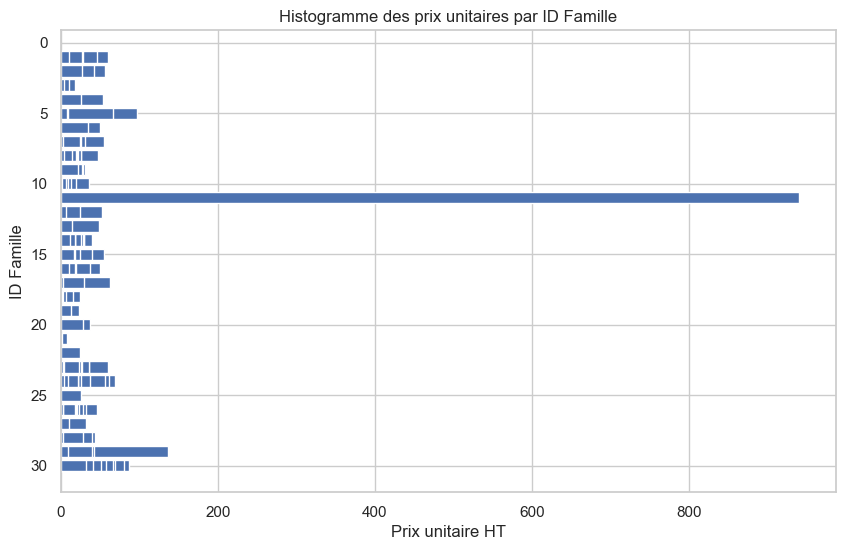

In [27]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données
db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="charlotteetlolaetangemarie051611",
    database="products_db"
)

# Création d'un curseur
c = db.cursor()

# Sélectionner les colonnes 'id_famille' et 'pu_ht' de la table 'articles'
select_query = "SELECT id_famille, pu_ht FROM articles"
c.execute(select_query)

# Récupérer les résultats dans un DataFrame Pandas
columns = [desc[0] for desc in c.description]
data = c.fetchall()
articles_df = pd.DataFrame(data, columns=columns)

# Fermer la connexion
db.close()

# Créer un histogramme à barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(articles_df['id_famille'], articles_df['pu_ht'])
plt.xlabel('Prix unitaire HT')
plt.ylabel('ID Famille')
plt.title('Histogramme des prix unitaires par ID Famille')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les familles en ordre décroissant
plt.show()
